In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import time
import matplotlib.pyplot as plt
import numpy as np
import tabulate
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [113]:
def get_data():
    lung_cancer = pd.read_csv('./survey_lung_cancer.csv')

    lung_cancer["AGE"] /= lung_cancer["AGE"].max()
    lung_cancer["SMOKING"] -= 1
    lung_cancer["YELLOW_FINGERS"] -= 1
    lung_cancer["ANXIETY"] -= 1
    lung_cancer["PEER_PRESSURE"] -= 1
    lung_cancer["CHRONIC DISEASE"] -= 1
    lung_cancer["FATIGUE"] -= 1
    lung_cancer["ALLERGY"] -= 1
    lung_cancer["WHEEZING"] -= 1
    lung_cancer["ALCOHOL CONSUMING"] -= 1
    lung_cancer["COUGHING"] -= 1
    lung_cancer["SHORTNESS OF BREATH"] -= 1
    lung_cancer["SWALLOWING DIFFICULTY"] -= 1
    lung_cancer["CHEST PAIN"] -= 1

    gender_encoder = LabelEncoder()
    encoded_gender = gender_encoder.fit_transform(lung_cancer['GENDER'])
    lung_cancer['GENDER'] = encoded_gender

    cancer_encoder = LabelEncoder()
    encoded_cancer = cancer_encoder.fit_transform(lung_cancer['LUNG_CANCER'])
    lung_cancer['LUNG_CANCER'] = encoded_gender

    features_chosen = [
        "GENDER",
        "AGE",
        "SMOKING",
        "YELLOW_FINGERS",
        "ANXIETY",
        "PEER_PRESSURE",
        "CHRONIC DISEASE",
        "FATIGUE",
        "ALLERGY",
        "WHEEZING",
        "ALCOHOL CONSUMING",
        "COUGHING",
        "SHORTNESS OF BREATH",
        "SWALLOWING DIFFICULTY",
        "CHEST PAIN",
    ]
    target = "LUNG_CANCER"

    X = lung_cancer[features_chosen]
    y = lung_cancer[target]

    return X, y

In [114]:
def compile_fit(layers_epochs, x_train, y_train, x_test, y_test):
    tf.keras.utils.set_random_seed(2055)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=x_train.shape[1]))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='binary_crossentropy')

    timestamp_before = time.time_ns()
    model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": model_history
    }

In [115]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2055)

In [118]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.793103,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0.850575,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0.678161,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,0.724138,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,0.724138,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0.643678,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,0.804598,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,0.666667,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,0.770115,1,0,1,0,0,1,1,0,1,1,1,0,1


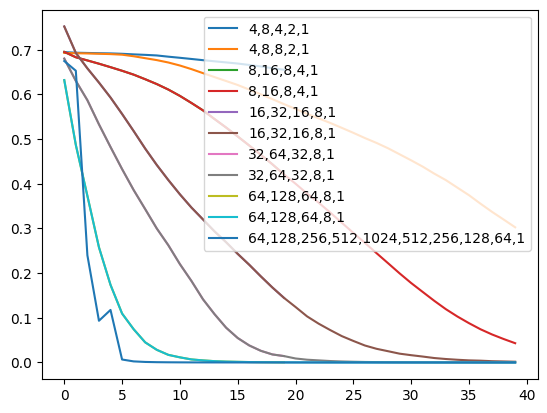

In [116]:
results = []

neuronal_nets = [
    [[4, 8, 4, 2, 1], 20],
    [[4, 8, 8, 2, 1], 40],
    [[8, 16, 8, 4, 1], 20],
    [[8, 16, 8, 4, 1], 40],
    [[16, 32, 16, 8, 1], 20],
    [[16, 32, 16, 8, 1], 40],
    [[32, 64, 32, 8, 1], 20],
    [[32, 64, 32, 8, 1], 40],
    [[64, 128, 64, 8, 1], 20],
    [[64, 128, 64, 8, 1], 40],
    [[64, 128, 256, 512, 1024, 512, 256, 128, 64, 1], 40],
]

for net in neuronal_nets:
    model_performance = compile_fit(net, X_train, y_train, X_test, y_test)
    model = model_performance["model"]
    time_taken = model_performance["elapsed_time"]
    history = model_performance["history"]

    indexed_result = [
        (','.join(map(str, net[0]))),
        net[1],
        history.history['loss'][0],
        history.history['loss'][len(history.history['loss']) // 2],
        history.history['loss'][-1],
        round(time_taken, 2)
    ]

    results.append(indexed_result)
    plt.plot(range(len(history.history['loss'])), history.history['loss'], label=(','.join(map(str, net[0]))))
    plt.legend()

plt.show()

In [117]:
print(tabulate.tabulate(results, headers=["Red", "Epocas", "loss Principio", "loss Mitad", "loss Final", "Tiempo (s)"]))

Red                                     Epocas    loss Principio    loss Mitad    loss Final    Tiempo (s)
------------------------------------  --------  ----------------  ------------  ------------  ------------
4,8,4,2,1                                   20          0.694725   0.681999      0.655176             1.05
4,8,8,2,1                                   40          0.69287    0.567585      0.302574             1.52
8,16,8,4,1                                  20          0.695223   0.596716      0.421049             1.15
8,16,8,4,1                                  40          0.695223   0.400233      0.0431466            1.36
16,32,16,8,1                                20          0.752092   0.376446      0.144707             0.9
16,32,16,8,1                                40          0.752092   0.124269      0.00169023           1.41
32,64,32,8,1                                20          0.68024    0.22021       0.0143453            1.03
32,64,32,8,1                          